In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import random
import os

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *

In [0]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

## **INPUT**

In [0]:
label = pd.read_csv('drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/5_post_pocessing/classification_label/label_5.csv')
label.index = label['id']
label.drop(('id'), axis=1, inplace=True)
# print(label.head(2))
label.columns = ['datetime','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10',
                 's11','s12','s13','s14','s15','s16','s17','s18','s19','s20',
                 's21','s22','s23','s24','s25','s26','s27']
# print(label.shape)
# print(label.head(2))
# print(label.tail(2))

print("Input")
print("  ")
print("  ")

df = pd.read_csv('drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/5_post_pocessing/input/INPUT.csv')
df.index = df['id']
df.drop(('id'), axis=1, inplace=True)
# print(df.shape)
# print(df.head(2))
# print(df.tail(2))

Input
  
  


In [0]:
df_concat = pd.concat([df, label], axis=1, sort=False)
df_concat.dropna(inplace=True)
# df_concat.head(2)

In [0]:
df = df_concat.iloc[:,:31]
# print(df.head(2))
# print(df.tail(2))
label = df_concat.iloc[:,31:]
# print(label.head(2))
# print(label.tail(2))

In [0]:
print(df.shape[0]%60)
part = df.shape[0]%60
df = df.iloc[part:,:]
label = label.iloc[part:,:]
print(df.shape)

4
(141480, 31)


In [0]:
df = df.iloc[:,1:].values.reshape(-1,60,30).transpose(0,1,2)
print(df.shape)
label = label.iloc[:,1:].values.reshape(-1,60,27).transpose(0,1,2)
label = np.max(label, axis = 1)
label = pd.DataFrame(label,columns=["s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10", "s11", "s12", "s13","s14",
                             "s15", "s16", "s17", "s18", "s19", "s20", "s21", "s22", "s23", "s24", "s25", "s26", "s27"])
print(label.shape)
print(type(label))

(2358, 60, 30)
(2358, 27)
<class 'pandas.core.frame.DataFrame'>


In [0]:
### LABEL DISTRIBUTION ###
labels = ["s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10", "s11", "s12", "s13","s14",
                             "s15", "s16", "s17", "s18", "s19", "s20", "s21", "s22", "s23", "s24", "s25", "s26", "s27"]
for X in labels:
  print(X)
  print(label[X].value_counts())
  print("  ")

s1
0.0    2303
1.0      55
Name: s1, dtype: int64
  
s2
0.0    2308
1.0      50
Name: s2, dtype: int64
  
s3
0.0    2334
1.0      24
Name: s3, dtype: int64
  
s4
0.0    2312
1.0      46
Name: s4, dtype: int64
  
s5
0.0    2306
1.0      52
Name: s5, dtype: int64
  
s6
0.0    2329
1.0      29
Name: s6, dtype: int64
  
s7
0.0    2309
1.0      49
Name: s7, dtype: int64
  
s8
0.0    2321
1.0      37
Name: s8, dtype: int64
  
s9
0.0    2327
1.0      31
Name: s9, dtype: int64
  
s10
0.0    2297
1.0      61
Name: s10, dtype: int64
  
s11
0.0    2312
1.0      46
Name: s11, dtype: int64
  
s12
0.0    2325
1.0      33
Name: s12, dtype: int64
  
s13
0.0    2306
1.0      52
Name: s13, dtype: int64
  
s14
0.0    2274
1.0      84
Name: s14, dtype: int64
  
s15
0.0    2320
1.0      38
Name: s15, dtype: int64
  
s16
0.0    2307
1.0      51
Name: s16, dtype: int64
  
s17
0.0    2295
1.0      63
Name: s17, dtype: int64
  
s18
0.0    2286
1.0      72
Name: s18, dtype: int64
  
s19
0.0    2358
Name: s19, d

In [0]:
label = label.s14
label.value_counts()

0.0    2274
1.0      84
Name: s14, dtype: int64

In [0]:
### MAPPING LABEL ###
diz_label, diz_reverse_label = {}, {}
for i,lab in enumerate(label.unique()):
    diz_label[lab] = i
    diz_reverse_label[i] = lab

print(diz_label)
print(diz_reverse_label)
label = label.map(diz_label)
y = to_categorical(label)

{0.0: 0, 1.0: 1}
{0: 0.0, 1: 1.0}


In [0]:
y.shape

(2358, 2)

In [0]:
### TRAIN TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 42, test_size=0.2)

### SCALE DATA ###
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [0]:
num_sensors = 30
TIME_PERIODS = 60
BATCH_SIZE = 16
EPOCHS = 20

model_m = Sequential()
model_m.add(Conv1D(100, 6, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
model_m.add(Conv1D(100, 6, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 6, activation='relu'))
model_m.add(Conv1D(160, 6, activation='relu'))
model_m.add(GlobalAveragePooling1D(name='G_A_P_1D'))
model_m.add(Dropout(0.5))
model_m.add(Dense(2, activation='softmax'))

model_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_m.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, verbose=2)

Epoch 1/20
95/95 - 1s - loss: 0.2083 - accuracy: 0.9549 - val_loss: 0.1267 - val_accuracy: 0.9709
Epoch 2/20
95/95 - 0s - loss: 0.1809 - accuracy: 0.9609 - val_loss: 0.1048 - val_accuracy: 0.9709
Epoch 3/20
95/95 - 0s - loss: 0.1335 - accuracy: 0.9609 - val_loss: 0.0701 - val_accuracy: 0.9709
Epoch 4/20
95/95 - 0s - loss: 0.1342 - accuracy: 0.9609 - val_loss: 0.1009 - val_accuracy: 0.9709
Epoch 5/20
95/95 - 0s - loss: 0.1194 - accuracy: 0.9609 - val_loss: 0.1163 - val_accuracy: 0.9709
Epoch 6/20
95/95 - 0s - loss: 0.1157 - accuracy: 0.9609 - val_loss: 0.0825 - val_accuracy: 0.9709
Epoch 7/20
95/95 - 0s - loss: 0.1097 - accuracy: 0.9609 - val_loss: 0.0847 - val_accuracy: 0.9709
Epoch 8/20
95/95 - 0s - loss: 0.0925 - accuracy: 0.9615 - val_loss: 0.0690 - val_accuracy: 0.9709
Epoch 9/20
95/95 - 0s - loss: 0.0846 - accuracy: 0.9675 - val_loss: 0.0660 - val_accuracy: 0.9709
Epoch 10/20
95/95 - 0s - loss: 0.0937 - accuracy: 0.9642 - val_loss: 0.0757 - val_accuracy: 0.9868
Epoch 11/20
95/95 -

In [0]:
model_m.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_71 (Conv1D)           (None, 55, 100)           18100     
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 50, 100)           60100     
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 16, 100)           0         
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 11, 160)           96160     
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 6, 160)            153760    
_________________________________________________________________
G_A_P_1D (GlobalAveragePooli (None, 160)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 160)             

In [0]:
model_m.evaluate(X_test, y_test, verbose=2)

15/15 - 0s - loss: 0.1113 - accuracy: 0.9703


[0.11128222942352295, 0.9703390002250671]

In [0]:
### GET PREDICTED CLASS ###

pred_test = np.argmax(model_m.predict(X_test), axis=1)

In [0]:
print(classification_report([diz_reverse_label[np.argmax(label)] for label in y_test], 
                            [diz_reverse_label[label] for label in pred_test]))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       458
         1.0       0.50      0.79      0.61        14

    accuracy                           0.97       472
   macro avg       0.75      0.88      0.80       472
weighted avg       0.98      0.97      0.97       472



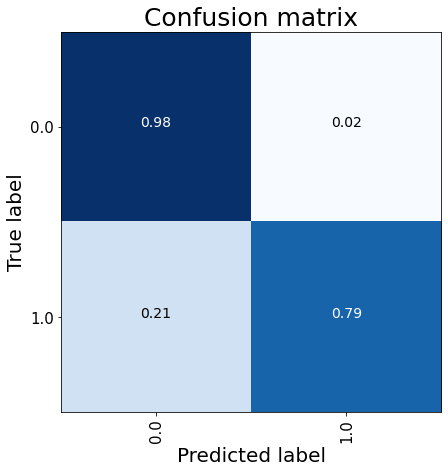

In [0]:
cnf_matrix = confusion_matrix([diz_reverse_label[np.argmax(label)] for label in y_test], 
                              [diz_reverse_label[label] for label in pred_test])

plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=list(diz_reverse_label.values()))
plt.show()

In [0]:
### MAKE A MODEL FOR EMBEDDINGS ###
emb_model = Model(inputs=model_m.input, outputs=model_m.get_layer('G_A_P_1D').output)
emb_model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_71_input (InputLayer) [(None, 60, 30)]          0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 55, 100)           18100     
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 50, 100)           60100     
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 16, 100)           0         
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 11, 160)           96160     
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 6, 160)            153760    
_________________________________________________________________
G_A_P_1D (GlobalAveragePooli (None, 160)               0  

In [0]:
### EXTRACT EMBEDDINGS ###
serie_features = emb_model.predict(X_test)
# serie_features = emb_model.predict(X_train)

In [0]:
serie_features.shape

(472, 160)

In [0]:
### VISUALIZE EMBEDDINGS ###
tsne = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=5)
T = tsne.fit_transform(serie_features)

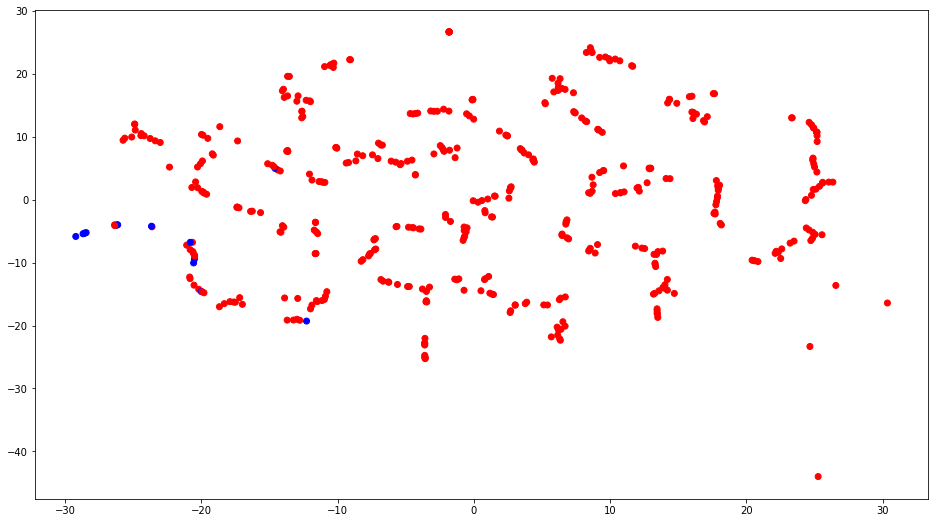

In [0]:
plt.figure(figsize=(16,9))
colors = {0:'red', 1:'blue', 2:'yellow'}
plt.scatter(T.T[0], T.T[1], c=[colors[i] for i in np.argmax(y_test, axis=1)]) 
# plt.scatter(T.T[0], T.T[1], c=[colors[i] for i in np.argmax(y_train, axis=1)])
plt.show()